In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/software-quality/software_quality_dataset_50k.csv
/kaggle/input/software-2/software_quality_dataset_100k_balanced.csv


In [62]:
df1=pd.read_csv("/kaggle/input/software-quality/software_quality_dataset_50k.csv")
df2=pd.read_csv("/kaggle/input/software-2/software_quality_dataset_100k_balanced.csv")

In [63]:
df = pd.concat([df1, df2], ignore_index=True)

In [64]:
df.head()

,LOC,Cyclomatic_Complexity,Code_Churn,Coupling,Bugs_Reported,Quality_Label
0,2324,3,199,5,7,Medium
1,4157,7,198,2,21,Medium
2,9435,5,161,7,1,Medium
3,988,5,65,4,16,Medium
4,934,20,60,9,13,Medium


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   LOC                    150000 non-null  int64 
 1   Cyclomatic_Complexity  150000 non-null  int64 
 2   Code_Churn             150000 non-null  int64 
 3   Coupling               150000 non-null  int64 
 4   Bugs_Reported          150000 non-null  int64 
 5   Quality_Label          150000 non-null  object
dtypes: int64(5), object(1)
memory usage: 6.9+ MB


In [66]:
df.describe()

,LOC,Cyclomatic_Complexity,Code_Churn,Coupling,Bugs_Reported
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,5137.560420,11.284707,96.254727,5.438627,10.214453
std,2856.207782,5.322394,56.471700,2.616680,7.481280
min,500.000000,3.000000,10.000000,1.000000,0.000000
25%,2517.000000,6.000000,44.000000,3.000000,3.000000
50%,5098.000000,11.000000,92.000000,6.000000,9.000000
75%,7709.000000,16.000000,145.000000,8.000000,17.000000
max,10000.000000,20.000000,200.000000,9.000000,24.000000


In [67]:
df.isnull().sum()

LOC                      0
Cyclomatic_Complexity    0
Code_Churn               0
Coupling                 0
Bugs_Reported            0
Quality_Label            0
dtype: int64

In [68]:
df['Quality_Label'].value_counts()

Quality_Label
Medium    67991
Low       46806
High      35203
Name: count, dtype: int64

In [69]:
df['Quality_Label'].value_counts()

Quality_Label
Medium    67991
Low       46806
High      35203
Name: count, dtype: int64

In [70]:
df['Quality_Label'].replace({'High': 0, 'Low': 2,'Medium':1 } , inplace=True)

/tmp/ipykernel_36/2916340977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quality_Label'].replace({'High': 0, 'Low': 2,'Medium':1 } , inplace=True)
/tmp/ipykernel_36/2916340977.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Quality_Label'].replace({'High': 0, 'Low': 2,'Medium':1 

In [71]:
df['Quality_Label'].value_counts()

Quality_Label
1    67991
2    46806
0    35203
Name: count, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   LOC                    150000 non-null  int64
 1   Cyclomatic_Complexity  150000 non-null  int64
 2   Code_Churn             150000 non-null  int64
 3   Coupling               150000 non-null  int64
 4   Bugs_Reported          150000 non-null  int64
 5   Quality_Label          150000 non-null  int64
dtypes: int64(6)
memory usage: 6.9 MB


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

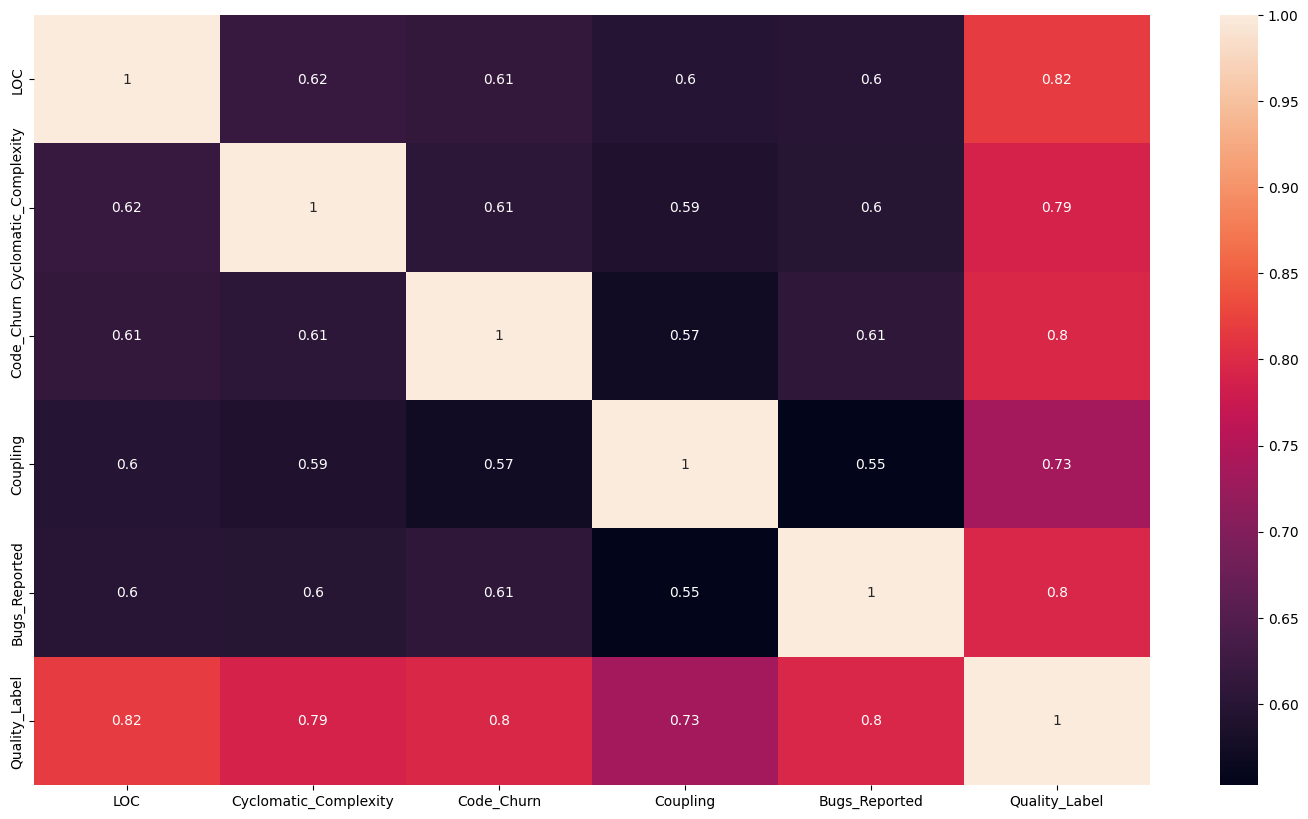

In [27]:
## Check for multicollinearity
plt.figure(figsize=(18,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

/tmp/ipykernel_36/452778427.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


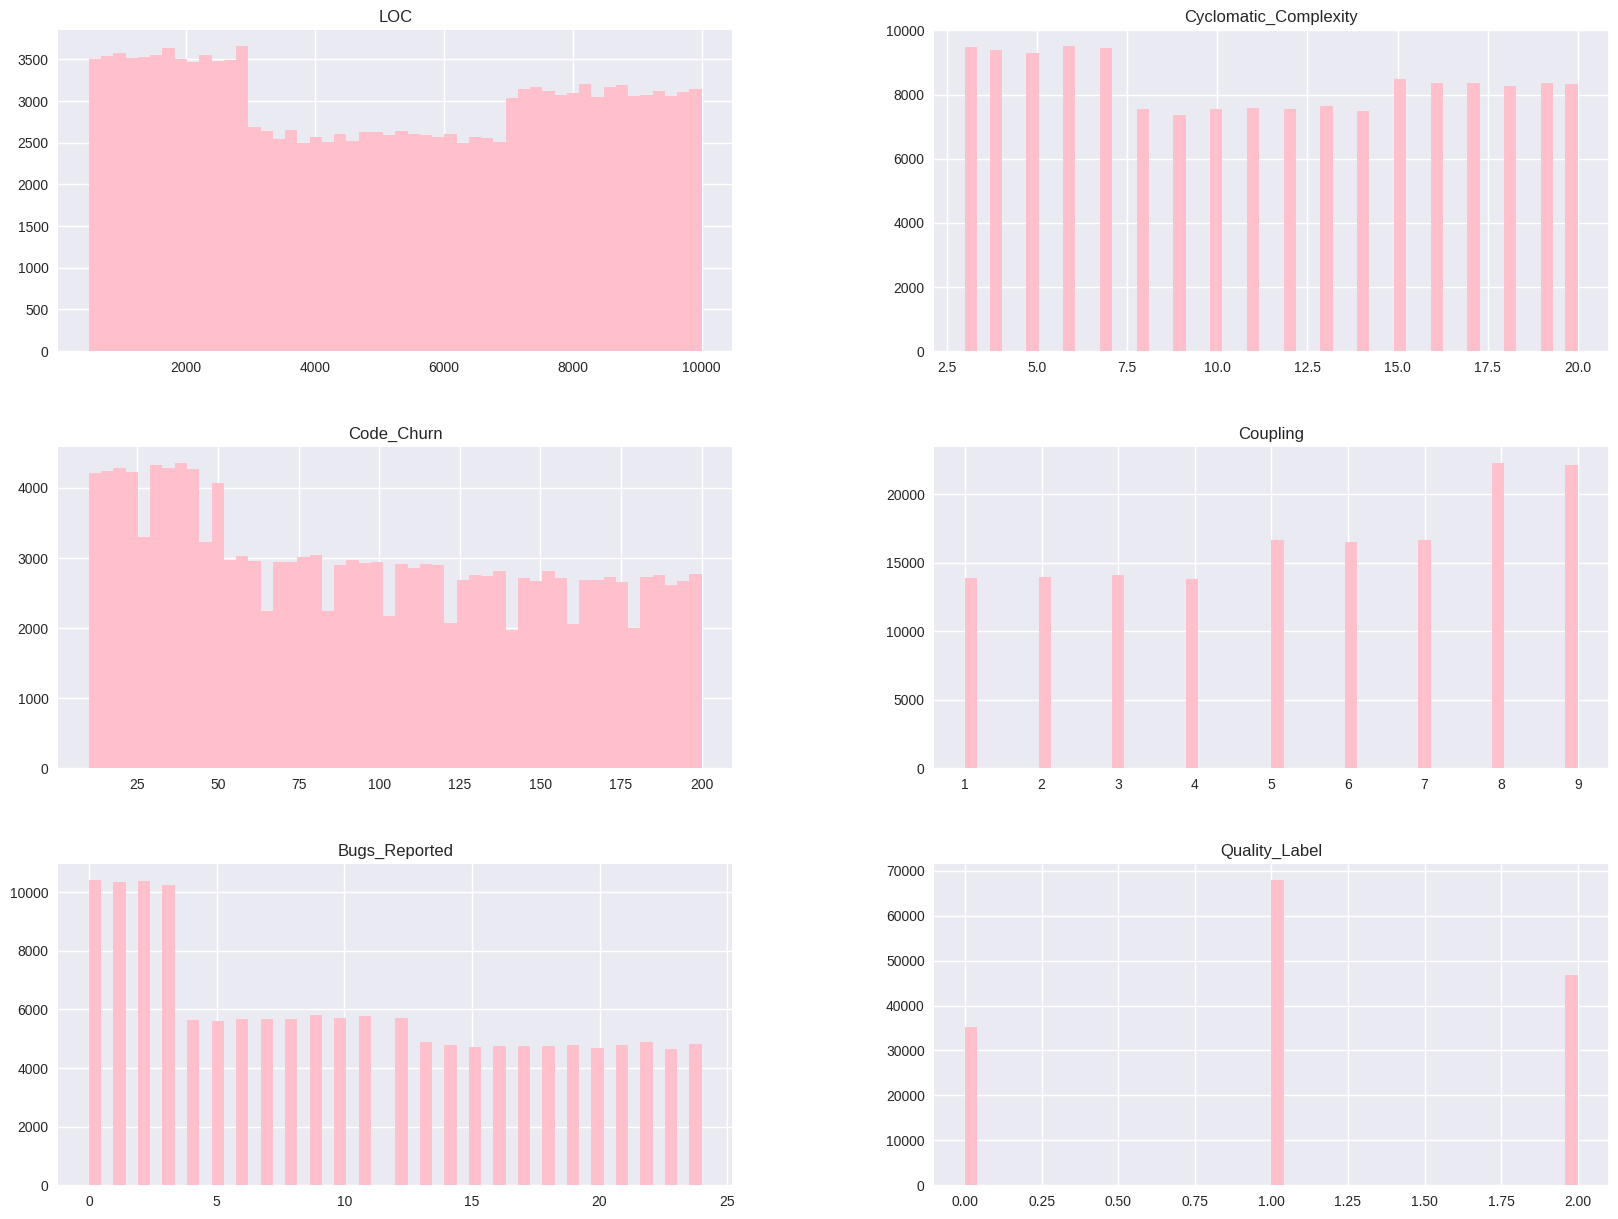

In [29]:
## Plot desnity plot for all features
plt.style.use('seaborn')
pd.DataFrame(df).hist(bins=50,figsize=(20,15),color='pink')
plt.show()

In [30]:
df.columns

Index(['LOC', 'Cyclomatic_Complexity', 'Code_Churn', 'Coupling',
       'Bugs_Reported', 'Quality_Label'],
      dtype='object')

In [31]:
X=df.drop(['Quality_Label'],axis=1)
y=df['Quality_Label']

In [33]:
X.head()

,LOC,Cyclomatic_Complexity,Code_Churn,Coupling,Bugs_Reported
0,2324,3,199,5,7
1,4157,7,198,2,21
2,9435,5,161,7,1
3,988,5,65,4,16
4,934,20,60,9,13


In [36]:
y.head(),y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: Quality_Label, dtype: int64,
 Quality_Label
 1    67991
 2    46806
 0    35203
 Name: count, dtype: int64)

In [37]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2529,stratify=y)

In [41]:
X_train.shape,y_train.shape

((120000, 5), (120000,))

In [42]:
# Feature Selection based on correlaltion
X_train.corr()

,LOC,Cyclomatic_Complexity,Code_Churn,Coupling,Bugs_Reported
LOC,1.000000,0.619826,0.612098,0.597452,0.601308
Cyclomatic_Complexity,0.619826,1.000000,0.606982,0.590700,0.598226
Code_Churn,0.612098,0.606982,1.000000,0.574658,0.609467
Coupling,0.597452,0.590700,0.574658,1.000000,0.552643
Bugs_Reported,0.601308,0.598226,0.609467,0.552643,1.000000


<Axes: >

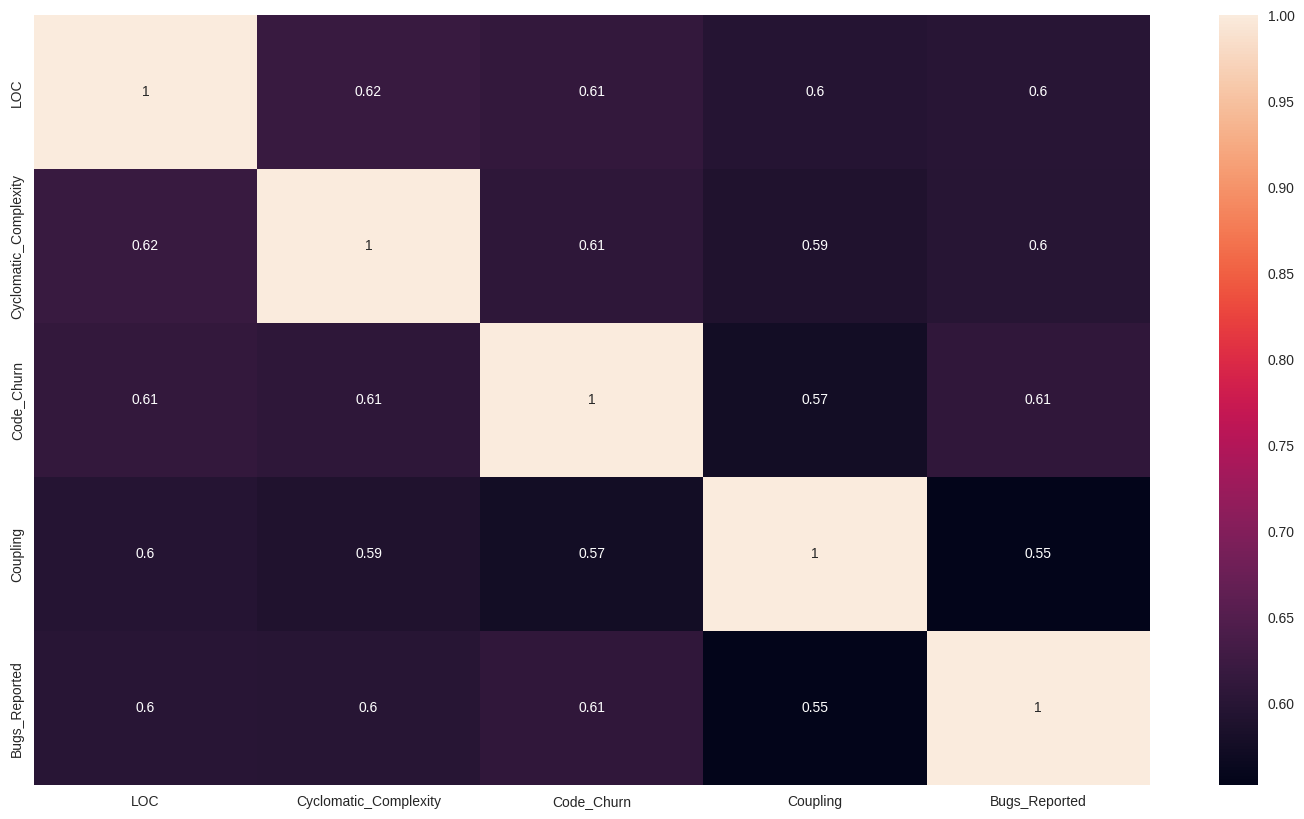

In [43]:
# Check for multicollinearity
plt.figure(figsize=(18,10))

corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [44]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [45]:
# threshold--Domain expertise
corr_features=correlation(X_train,0.70)

In [46]:
corr_features

set()

In [47]:
# drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((120000, 5), (30000, 5))

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
mm=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [49]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4
count,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05
mean,1.406875e-16,-1.515825e-16,-8.171241e-17,1.295556e-16,3.801404e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.622054e+00,-1.555663e+00,-1.526997e+00,-1.697722e+00,-1.365627e+00
25%,-9.179019e-01,-9.925111e-01,-9.250425e-01,-9.334530e-01,-9.646985e-01
50%,-1.436229e-02,-5.392491e-02,-7.522426e-02,2.129509e-01,-1.628406e-01
75%,9.014204e-01,8.846613e-01,8.631167e-01,9.772202e-01,9.063032e-01
max,1.701069e+00,1.635530e+00,1.836867e+00,1.359355e+00,1.841804e+00


/tmp/ipykernel_36/4125306407.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


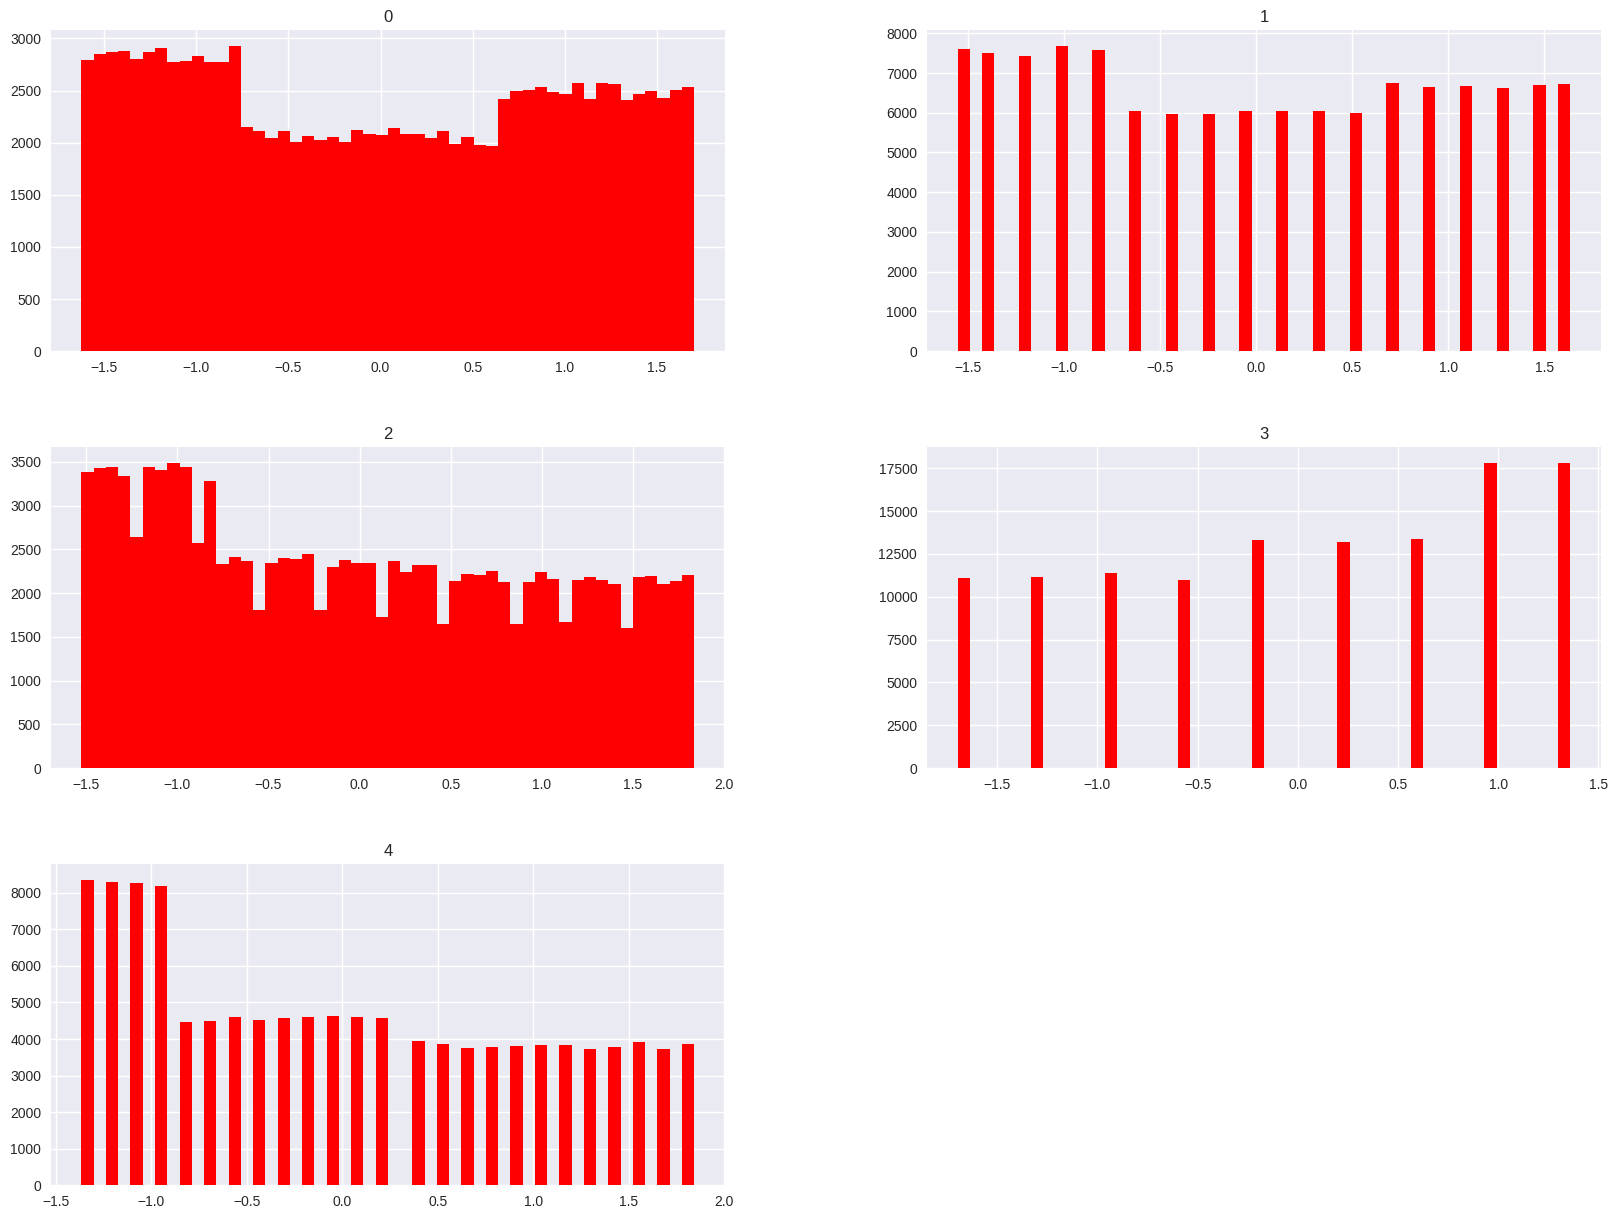

In [50]:
## Plot desnity plot for all features
plt.style.use('seaborn')
pd.DataFrame(X_train_scaled).hist(bins=50,figsize=(20,15),color='red')
plt.show()

/tmp/ipykernel_36/2382124604.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

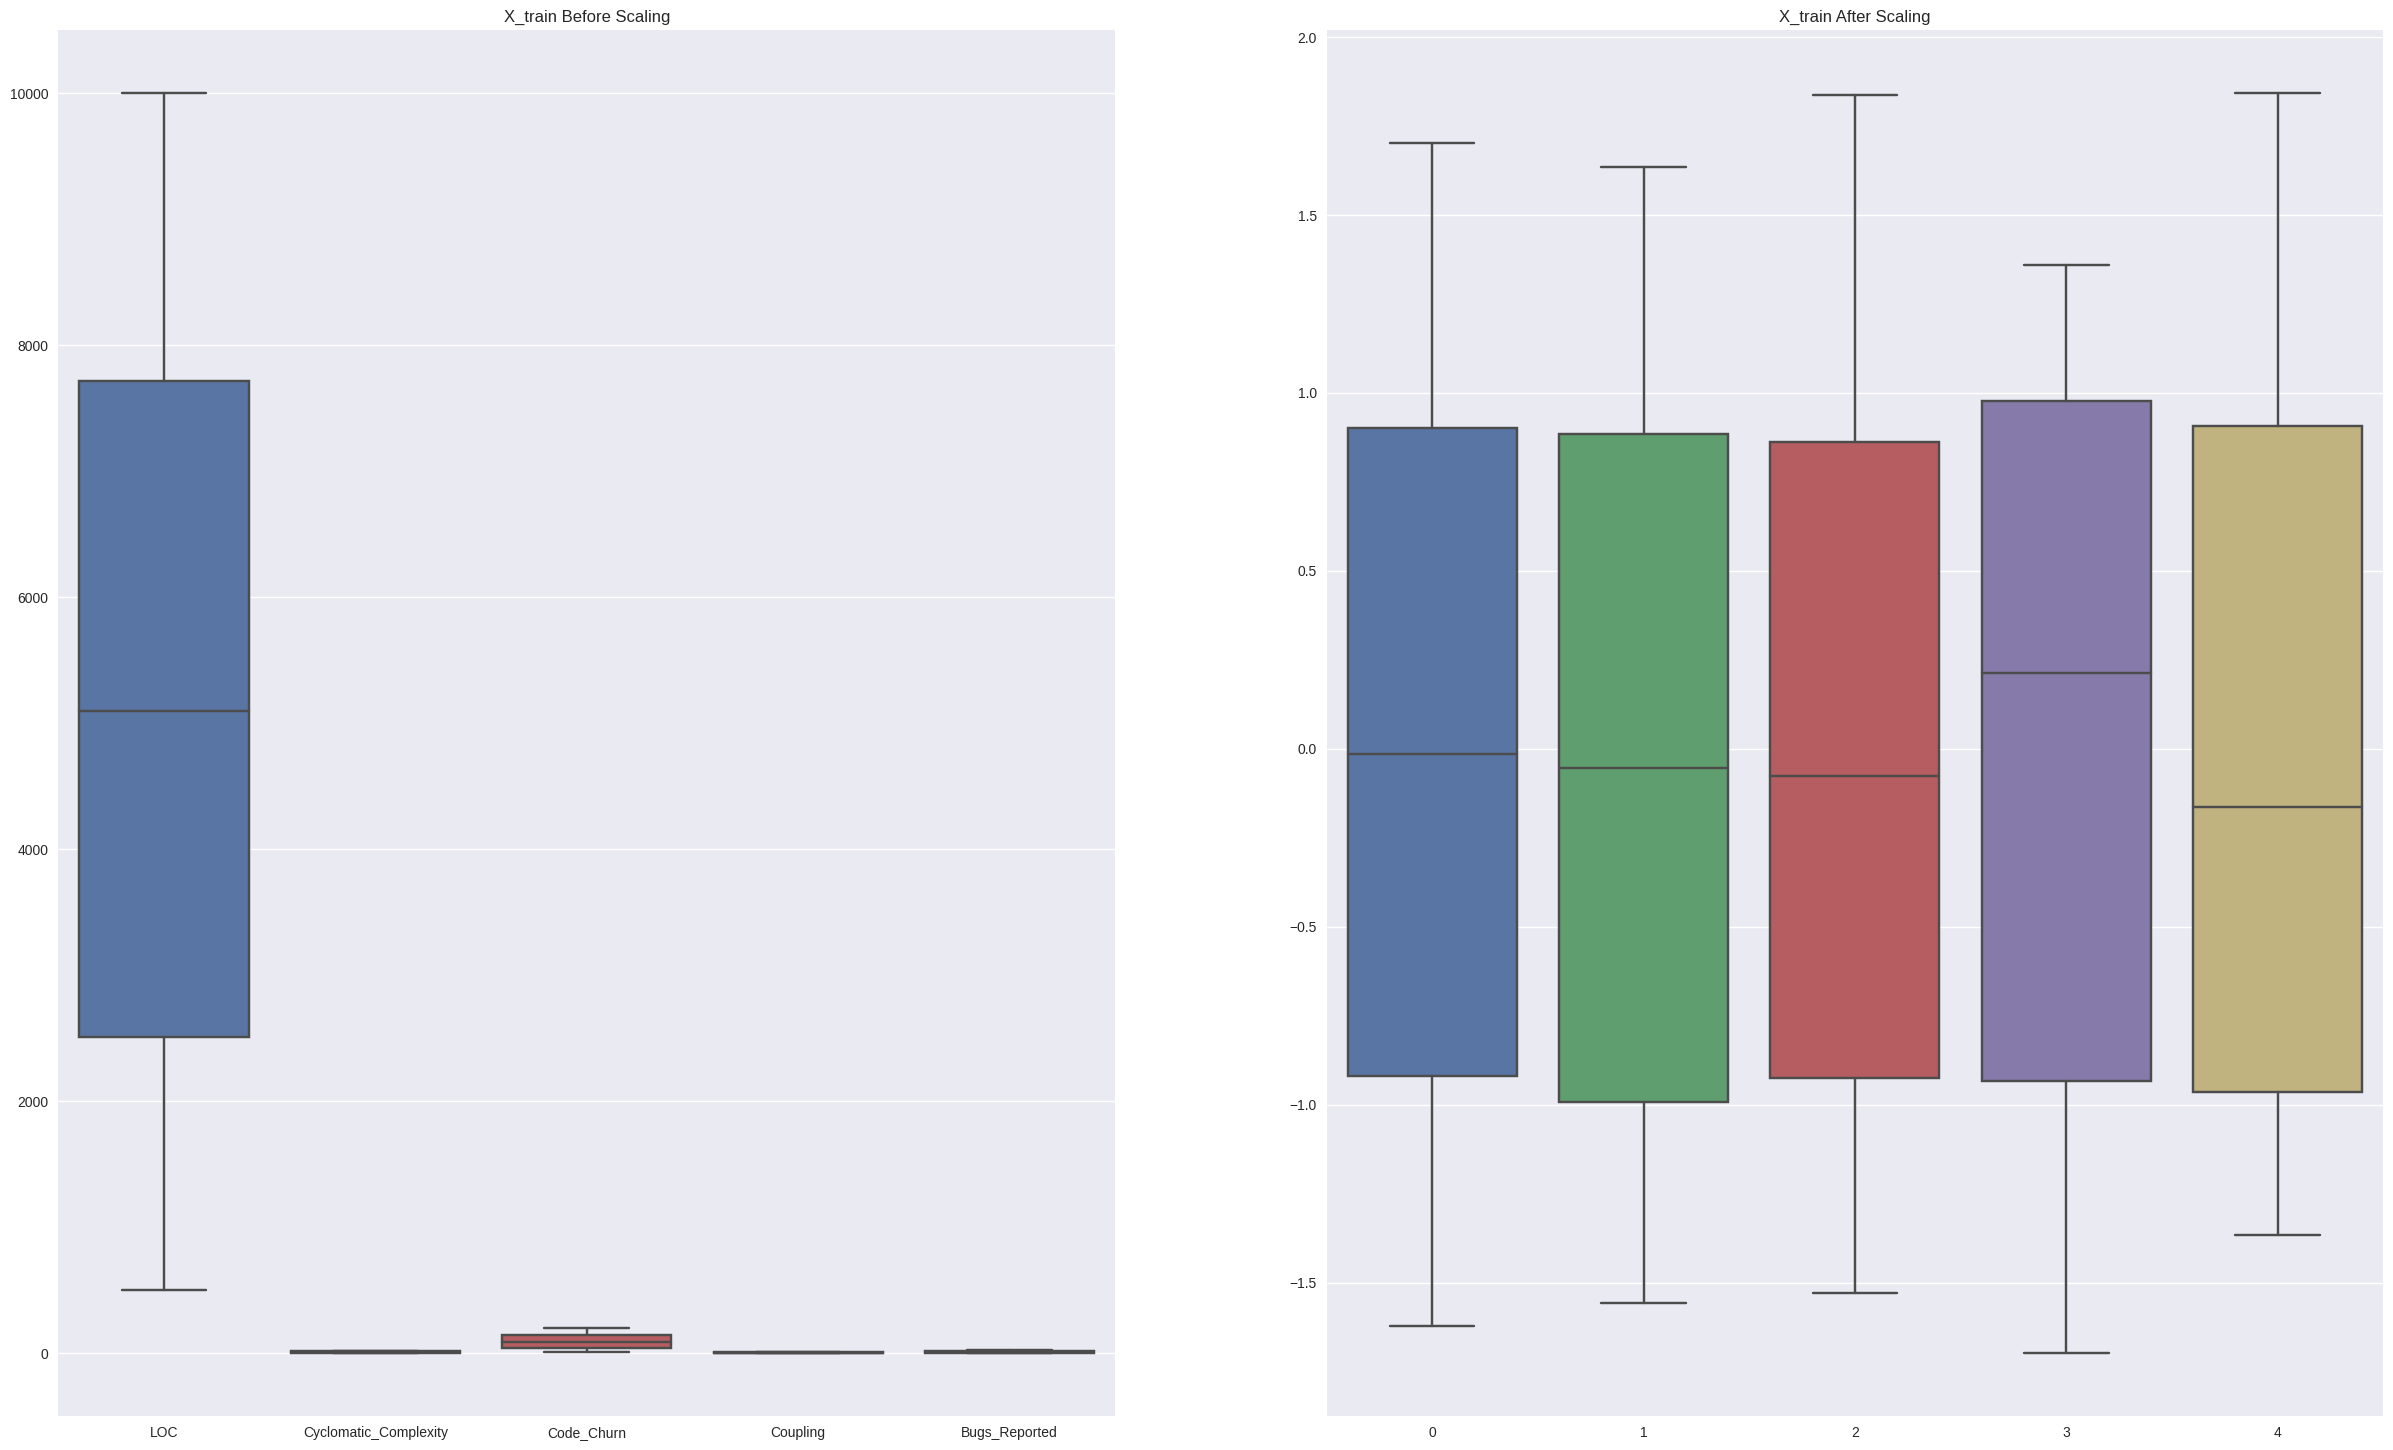

In [51]:
plt.subplots(figsize=(30, 18))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import lightgbm as lgb
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,\
                            confusion_matrix

In [53]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize

models = {
    "Logisitic Regression": LogisticRegression(max_iter=1000),
    "knn": KNeighborsClassifier(),
    "NB": BernoulliNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Adaboost": AdaBoostClassifier(),
    "Gausian": GaussianNB(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Xgboost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "svm": SVC(probability=True),  # probability=True is required for ROC
    "Random Forest": RandomForestClassifier(),
}

# Binarize y values for ROC AUC
y_train_bin = label_binarize(y_train, classes=list(set(y_train)))
y_test_bin = label_binarize(y_test, classes=list(set(y_test)))

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)

    # Predictions (labels)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Predictions (probabilities) for ROC AUC
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train_scaled)
        y_test_proba = model.predict_proba(X_test_scaled)
    else:
        print(f"{model_name} does not support predict_proba, skipping ROC AUC calculation.")
        y_train_proba = None
        y_test_proba = None

    # Train metrics
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')

    if y_train_proba is not None:
        model_train_rocauc_score = roc_auc_score(y_train_bin, y_train_proba, multi_class='ovr', average='weighted')
    else:
        model_train_rocauc_score = float('nan')

    # Test metrics
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')

    if y_test_proba is not None:
        model_test_rocauc_score = roc_auc_score(y_test_bin, y_test_proba, multi_class='ovr', average='weighted')
    else:
        model_test_rocauc_score = float('nan')

    # Display results
    print(f"{model_name}")
    print("Model performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

    print("----------------------------------")

    print("Model performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print("="*40)
    print("\n")


Logisitic Regression
Model performance for Training set
- Accuracy: 0.9985
- F1 Score: 0.9985
- Precision: 0.9985
- Recall: 0.9985
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9983
- F1 Score: 0.9983
- Precision: 0.9983
- Recall: 0.9983
- ROC AUC Score: 1.0000


knn
Model performance for Training set
- Accuracy: 0.9933
- F1 Score: 0.9933
- Precision: 0.9933
- Recall: 0.9933
- ROC AUC Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.9890
- F1 Score: 0.9890
- Precision: 0.9890
- Recall: 0.9890
- ROC AUC Score: 0.9993


NB
Model performance for Training set
- Accuracy: 0.9134
- F1 Score: 0.9132
- Precision: 0.9132
- Recall: 0.9134
- ROC AUC Score: 0.9767
----------------------------------
Model performance for Test set
- Accuracy: 0.9109
- F1 Score: 0.9106
- Precision: 0.9106
- Recall: 0.9109
- ROC AUC Score: 0.9753


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
-

# Logistic Regression

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7041
           1       1.00      1.00      1.00     13598
           2       1.00      1.00      1.00      9361

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

[[ 7027    14     0]
 [    0 13551    47]
 [    0     5  9356]]
ROC AUC Score (OvR): 0.9999


/tmp/ipykernel_36/602816264.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(classes))


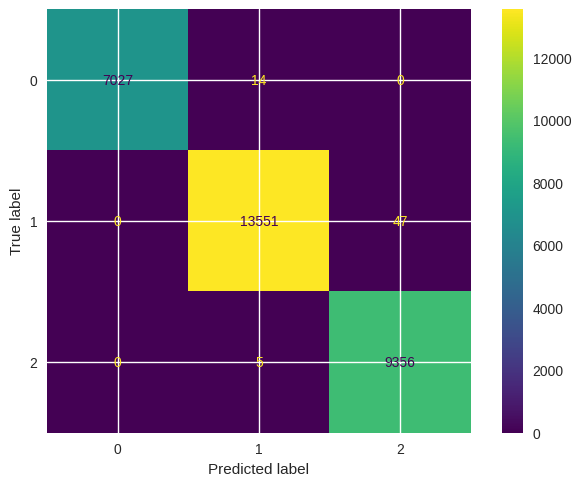

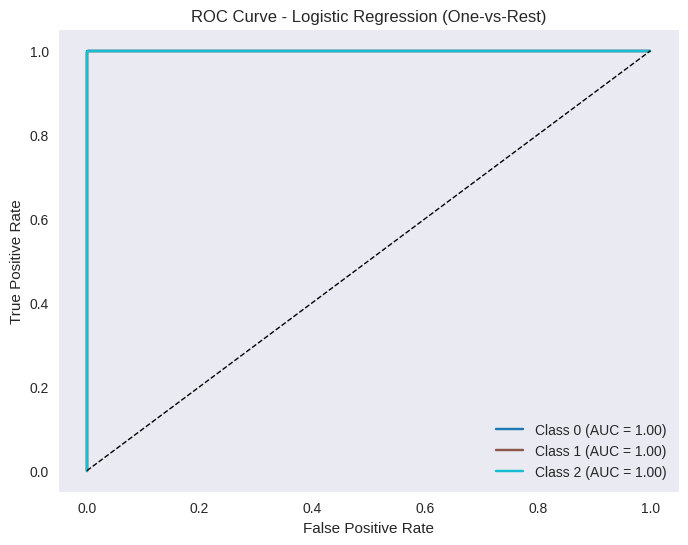

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Train your model
model = LogisticRegression(multi_class='ovr', max_iter=100)
model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred, labels=model.classes_))
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

# ---------------------- ROC AUC (One-vs-Rest) ----------------------
# Binarize the output
classes = model.classes_
y_test_bin = label_binarize(y_test, classes=classes)
y_test_proba = model.predict_proba(X_test_scaled)

# Compute ROC AUC (OvR)
roc_auc = roc_auc_score(y_test_bin, y_test_proba, multi_class='ovr', average='weighted')
print(f"ROC AUC Score (OvR): {roc_auc:.4f}")

# ---------------------- Optional: Plot ROC curves ----------------------
fpr = dict()
tpr = dict()
roc_auc_individual = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc_individual[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', len(classes))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc_individual[i]:.2f})', color=colors(i))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# KNN

K-Nearest Neighbors (KNN)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7041
           1       0.99      0.99      0.99     13598
           2       0.99      0.98      0.99      9361

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000

ROC AUC Score (OvR): 0.9993


/tmp/ipykernel_36/708238333.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(classes))


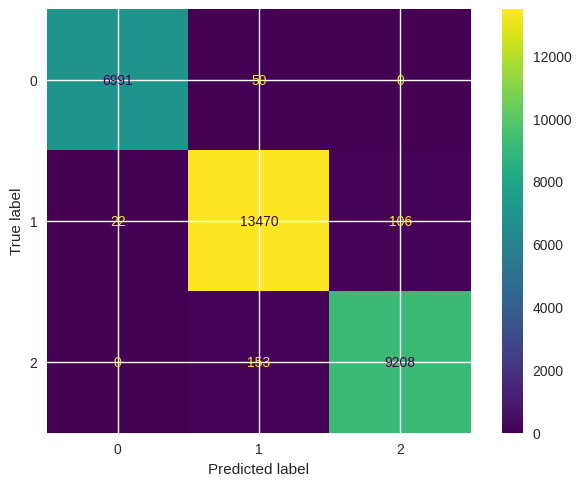

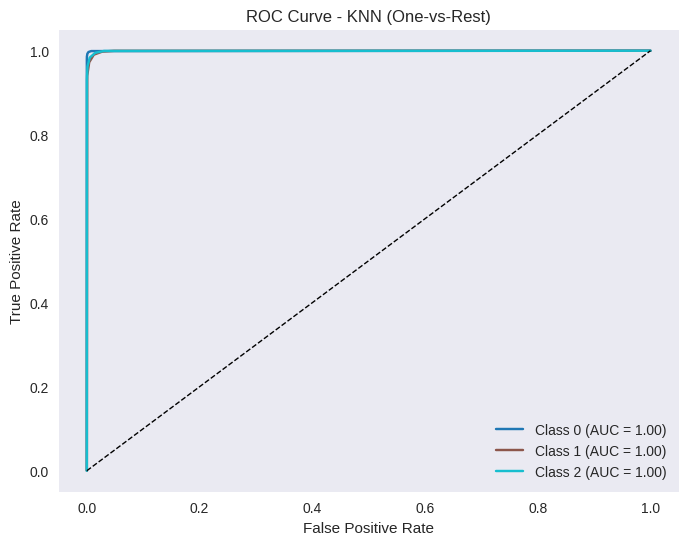

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Train KNN model
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

# Predict class labels
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Print classification report and confusion matrix
print("K-Nearest Neighbors (KNN)")
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

# -------------------- ROC AUC (OvR) --------------------

# Binarize the output labels
classes = model.classes_
y_test_bin = label_binarize(y_test, classes=classes)
y_test_proba = model.predict_proba(X_test_scaled)

# Compute ROC AUC Score (weighted average for OvR)
roc_auc = roc_auc_score(y_test_bin, y_test_proba, multi_class='ovr', average='weighted')
print(f"ROC AUC Score (OvR): {roc_auc:.4f}")

# -------------------- Plot ROC Curve per class --------------------
fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', len(classes))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc_class[i]:.2f})', color=colors(i))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Bernaulli

Naive Bayes (Bernoulli or Gaussian)
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7041
           1       0.91      0.89      0.90     13598
           2       0.89      0.89      0.89      9361

    accuracy                           0.91     30000
   macro avg       0.91      0.92      0.92     30000
weighted avg       0.91      0.91      0.91     30000

ROC AUC Score (OvR): 0.9753


/tmp/ipykernel_36/1060819328.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(classes))


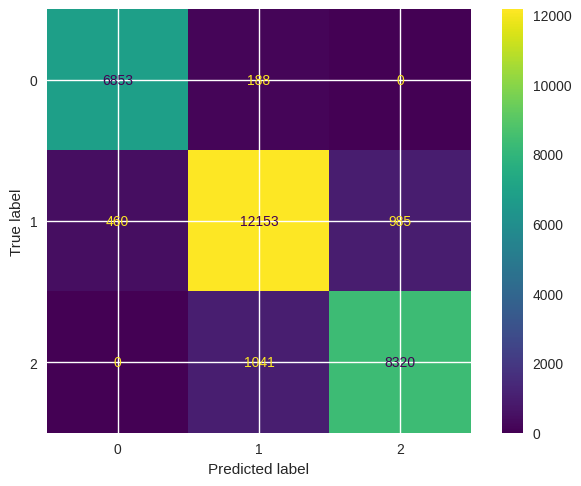

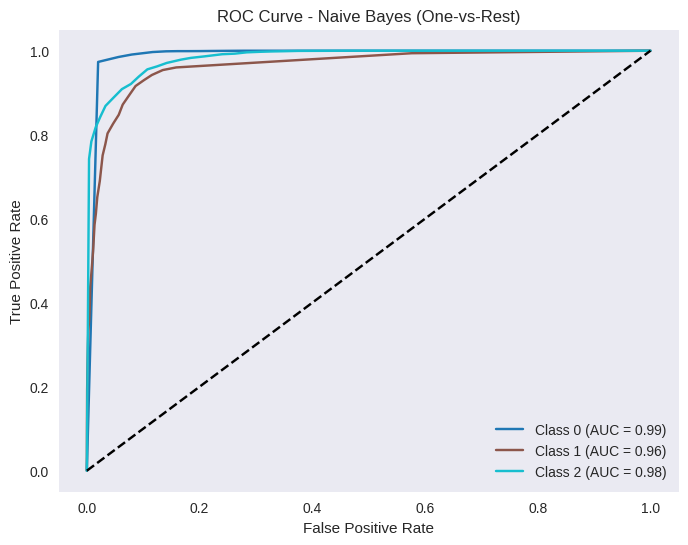

In [57]:
from sklearn.naive_bayes import BernoulliNB  # or GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Initialize and train Naive Bayes
model = BernoulliNB()  # or GaussianNB()
model.fit(X_train_scaled, y_train)

# Predict labels
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate performance
print("Naive Bayes (Bernoulli or Gaussian)")
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

# ------------------ ROC AUC Score (OvR) ------------------
# Binarize target labels
classes = model.classes_
y_test_bin = label_binarize(y_test, classes=classes)
y_test_proba = model.predict_proba(X_test_scaled)

# ROC AUC Score
roc_auc = roc_auc_score(y_test_bin, y_test_proba, multi_class='ovr', average='weighted')
print(f"ROC AUC Score (OvR): {roc_auc:.4f}")

# ------------------ ROC Curve per class ------------------
fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', len(classes))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc_class[i]:.2f})', color=colors(i))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Decision Tree

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7041
           1       0.97      0.97      0.97     13598
           2       0.97      0.97      0.97      9361

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000

ROC AUC Score (OvR): 0.9802


/tmp/ipykernel_36/2894206533.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(classes))


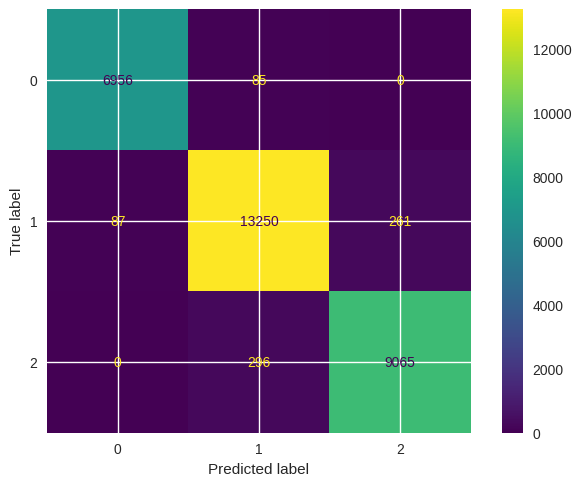

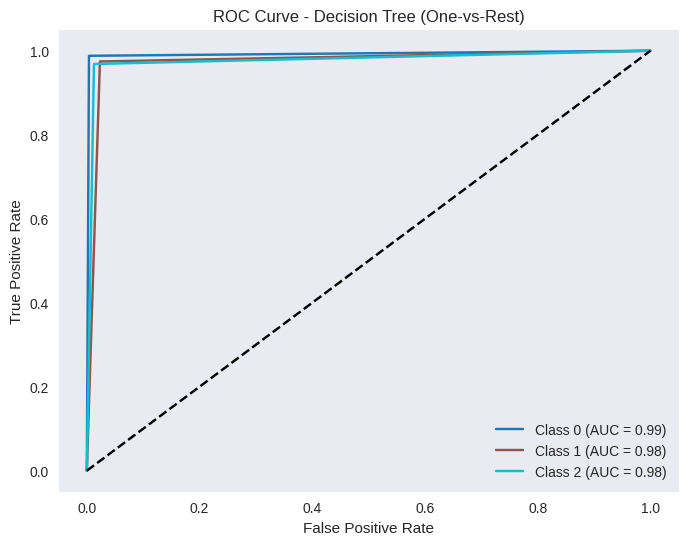

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Initialize and train Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

# Predict labels
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluation
print("Decision Tree Classifier")
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

# ------------------ ROC AUC (OvR) ------------------
# Binarize target
classes = model.classes_
y_test_bin = label_binarize(y_test, classes=classes)
y_test_proba = model.predict_proba(X_test_scaled)

# ROC AUC Score
roc_auc = roc_auc_score(y_test_bin, y_test_proba, multi_class='ovr', average='weighted')
print(f"ROC AUC Score (OvR): {roc_auc:.4f}")

# ------------------ ROC Curve for each class ------------------
fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', len(classes))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc_class[i]:.2f})', color=colors(i))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# SVM

Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7041
           1       1.00      1.00      1.00     13598
           2       1.00      1.00      1.00      9361

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

ROC AUC Score (OvR): 0.9999


/tmp/ipykernel_36/3302173603.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(classes))


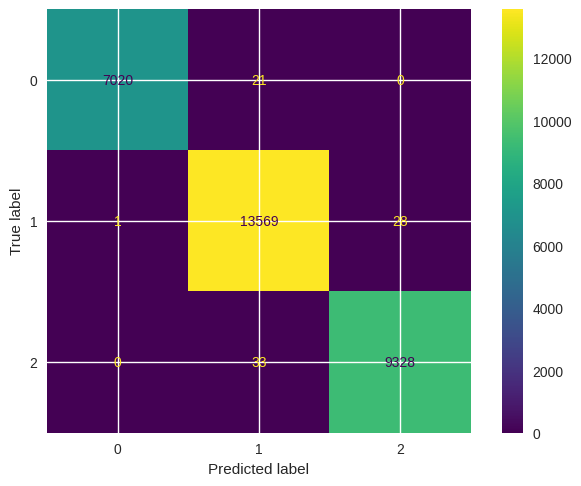

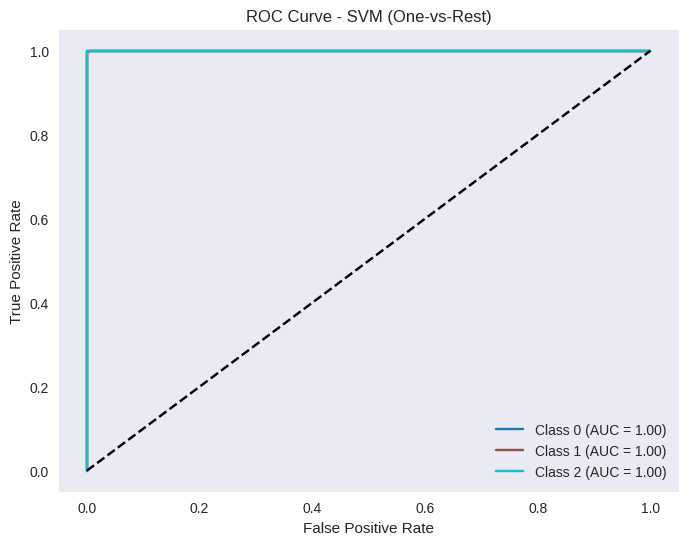

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Train SVM (make sure probability=True)
model = SVC(probability=True)
model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluation
print("Support Vector Machine (SVM)")
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

# ------------------ ROC AUC (OvR) ------------------
classes = model.classes_

# Binarize target for ROC AUC
y_test_bin = label_binarize(y_test, classes=classes)
y_test_proba = model.predict_proba(X_test_scaled)

# Compute overall ROC AUC (OvR)
roc_auc = roc_auc_score(y_test_bin, y_test_proba, multi_class='ovr', average='weighted')
print(f"ROC AUC Score (OvR): {roc_auc:.4f}")

# ------------------ ROC Curve per class ------------------
fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', len(classes))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc_class[i]:.2f})', color=colors(i))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Random Forest


Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7041
           1       0.98      0.99      0.99     13598
           2       0.99      0.98      0.98      9361

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000

ROC AUC Score (OvR): 0.9997


/tmp/ipykernel_36/3872149019.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(classes))


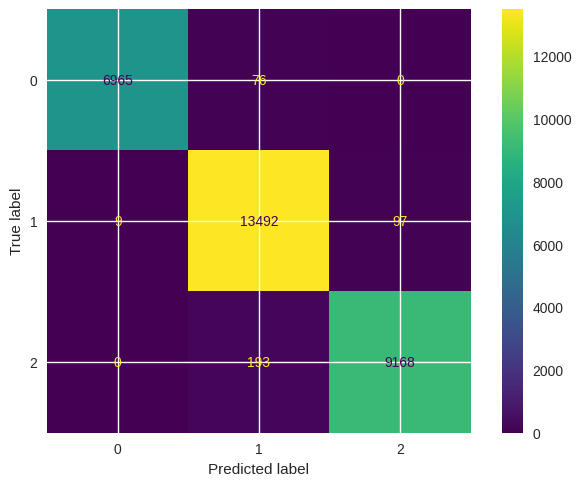

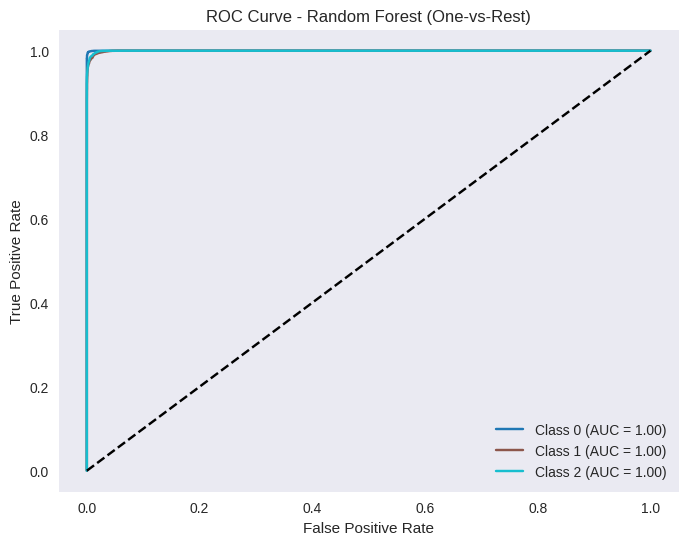

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Train Random Forest
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluation
print("Random Forest Classifier")
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

# ------------------ ROC AUC (OvR) ------------------
classes = model.classes_

# Binarize target
y_test_bin = label_binarize(y_test, classes=classes)
y_test_proba = model.predict_proba(X_test_scaled)

# Compute weighted ROC AUC
roc_auc = roc_auc_score(y_test_bin, y_test_proba, multi_class='ovr', average='weighted')
print(f"ROC AUC Score (OvR): {roc_auc:.4f}")

# ------------------ ROC Curve per class ------------------
fpr = dict()
tpr = dict()
roc_auc_class = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc_class[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', len(classes))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc_class[i]:.2f})', color=colors(i))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid()
plt.show()
